<a href="https://colab.research.google.com/github/martha267122/martha267122/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 25.2MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
#create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 81ms/step - loss: 0.5917 - accuracy: 0.6808 - val_loss: 0.4632 - val_accuracy: 0.7782
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4458 - accuracy: 0.7914 - val_loss: 0.4269 - val_accuracy: 0.8078
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3273 - accuracy: 0.8554 - val_loss: 0.4946 - val_accuracy: 0.7998
Epoch 4/10
625/625 [==============================] - 51s 80ms/step - loss: 0.1952 - accuracy: 0.9203 - val_loss: 0.6286 - val_accuracy: 0.8004
Epoch 5/10
625/625 [==============================] - 57s 90ms/step - loss: 0.1096 - accuracy: 0.9584 - val_loss: 0.8573 - val_accuracy: 0.7962
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0651 - accuracy: 0.9776 - val_loss: 1.2309 - val_accuracy: 0.7764
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0584 - accuracy: 0.9805 - val_loss: 0.9992 - val_accuracy:

In [12]:
import cv2

In [14]:
import matplotlib.pyplot as plt

In [18]:
test_img = cv2.imread('/content/cat.jpg')

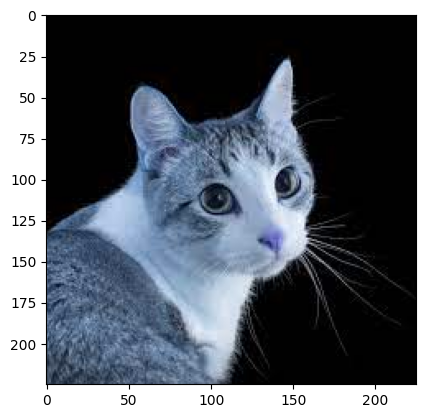

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(225, 225, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input=test_img.reshape((1,256,256,3))

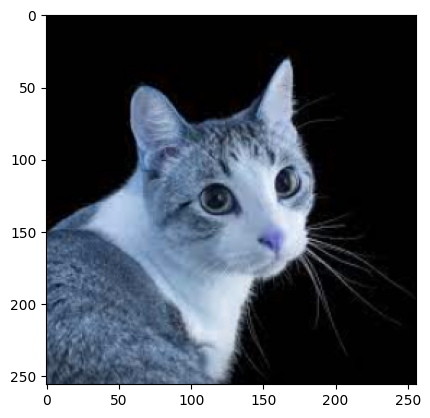

In [24]:
plt.imshow(test_img)

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 362ms/step


array([[0.]], dtype=float32)

In [26]:
test_img1 = cv2.imread('/content/cat.jpg')

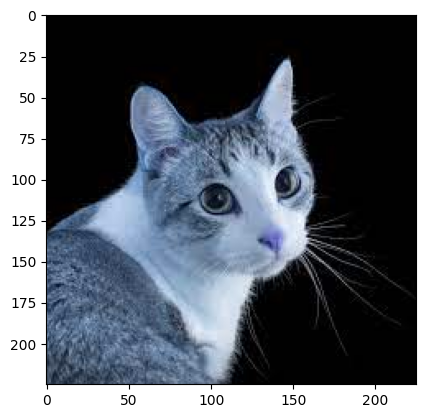

In [27]:
plt.imshow(test_img1)

In [28]:
test_img1.shape

(225, 225, 3)

In [29]:
print(tf.__version__)

2.15.0
